## Most of the variables are categorical, it's necessary to do the transformation before modeling

In [1]:
## Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [2]:
## show Chinese character
## source: https://jdhao.github.io/2017/05/13/guide-on-how-to-use-chinese-with-matplotlib/
##         https://stackoverflow.com/questions/25561009/how-do-you-i-use-mandarin-characters-in-matplotlib

import matplotlib as mpl
font_name = "STKaiti"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

# plt.text(0.5, 0.5, s=u'测试')
# plt.show()

In [3]:
# df = pd.read_csv('../data/sensors.csv', dtype='unicode')
df = pd.read_csv('../data/sensors_cleaned_user.csv')

In [4]:
## save a backup df
df_backup = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 66 columns):
distinct_id                11756 non-null object
number_of_visit            11756 non-null int64
browser                    11756 non-null object
first_referrer             11756 non-null object
first_referrer_host        11756 non-null object
first_browser_language     11756 non-null object
first_visit_time           11756 non-null object
ip                         11756 non-null object
is_first_day               11756 non-null bool
is_first_time              11756 non-null bool
latest_referrer            11756 non-null object
latest_referrer_host       11756 non-null object
latest_utm_campaign        11756 non-null object
latest_utm_content         11756 non-null object
latest_utm_medium          11756 non-null object
latest_utm_source          11756 non-null object
latest_utm_term            11756 non-null object
model                      11756 non-null object
os            

In [6]:
df.head()

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,first_visit_time_date,signup
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,qq,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-07,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,2,2017-03-07,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,2017-03-13,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,qq,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,2017-03-09,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,2017-03-09,False


In [7]:
df.drop(['first_visit_time_date'], axis=1, inplace=True)

In [8]:
df['isSuccess'].value_counts()

False    11755
True         1
Name: isSuccess, dtype: int64

### Converting categorical variables

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 65 columns):
distinct_id                11756 non-null object
number_of_visit            11756 non-null int64
browser                    11756 non-null object
first_referrer             11756 non-null object
first_referrer_host        11756 non-null object
first_browser_language     11756 non-null object
first_visit_time           11756 non-null object
ip                         11756 non-null object
is_first_day               11756 non-null bool
is_first_time              11756 non-null bool
latest_referrer            11756 non-null object
latest_referrer_host       11756 non-null object
latest_utm_campaign        11756 non-null object
latest_utm_content         11756 non-null object
latest_utm_medium          11756 non-null object
latest_utm_source          11756 non-null object
latest_utm_term            11756 non-null object
model                      11756 non-null object
os            

Categorical variables:
01. browser
* first_referrer
* first_referrer_host 
* first_browser_language
* latest_referrer         
* latest_referrer_host     
* latest_utm_campaign     
* latest_utm_content     
* latest_utm_medium     
* latest_utm_source   
* latest_utm_term         
* model                
* os                       
* referrer             
* referrer_host            
* title             
* url                   
* url_path           
* utm_campaign          
* utm_content               
* utm_medium        
* utm_source        
* utm_term               
* latest_ch                
* session_from_url       
* session_referrer      
* session_referrer_domain   
* session_referrer_host     
* ch                      
* company               
* from_url      
* info             
* page       
* pagePosition          
* pageUrl                 
* project_name      
* referrHostUrl           
* referrerUrl         
* requestBtn              
* result         
* session_page_url       
* siteUrl                   
* site_url                  
* type                    
* day_of_week                 
* hour_of_day
* is_first_day                            bool
* is_first_time                           bool
* verification_code                       bool
* contact                                 bool
* email                                   bool
* isMsg                                   bool
* isSuccess                               bool
* name                                    bool

#### convert day_of_week and hour_of_day to categorical

In [373]:
df['day_of_week'].value_counts()

4    9712
1     819
0     496
3     287
2     262
6      98
5      82
Name: day_of_week, dtype: int64

In [374]:
df['day_of_week'] = df.day_of_week.astype('category')

In [375]:
df['day_of_week'].dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6], ordered=False)

In [376]:
df['hour_of_day'].value_counts()

11    9545
9      266
8      233
7      227
10     220
6      200
2      185
3      166
1      104
5      101
12      97
4       77
14      76
13      71
15      52
16      42
0       41
17      18
23       9
18       9
20       6
19       5
21       3
22       3
Name: hour_of_day, dtype: int64

In [377]:
df['hour_of_day'] = df.hour_of_day.astype('category')

In [378]:
df['hour_of_day'].dtypes

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23],
                 ordered=False)

#### For categorical variables with too many options, keep the most a few common elements and set others to 'others'

In [379]:
# 1 browser
df['browser'].value_counts()

chrome            6533
no_brower          978
safari             788
firefox            614
micromessenger     535
ie                 530
qq                 472
sogou              440
edge               241
uc                 203
mi                  73
na                  69
baidu               60
maxthon             54
webview             53
theworld            33
android             26
opera               20
liebao              16
360                  9
tt                   6
coolnovo             1
yandex               1
ali-ap               1
Name: browser, dtype: int64

In [380]:
## write a function to replace the uncommon items to others

def others(thresh, col):
    threshold = thresh
    column = col
    counts = df[column].value_counts()
    repl = counts[counts < threshold].index
    df[column] = df[column].replace(repl, 'others')

In [381]:
others(600, 'browser')

In [382]:
df['browser'].value_counts()

chrome       6533
others       2843
no_brower     978
safari        788
firefox       614
Name: browser, dtype: int64

In [383]:
df.head()

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,siteUrl,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,signup
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,others,https://m.baidu.com/baidu.php?sc.5iTK000iX_O08...,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_siteUrl,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_siteUrl,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,2,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,others,http://class.sanjieke.cn/class.html,class.sanjieke.cn,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,False


In [384]:
# 2 first_referrer
df['first_referrer'].value_counts()

no_first_referrer                                                                                                                                                                                           5030
https://www.baidu.com/baidu.php                                                                                                                                                                             3487
https://www.baidu.com/link                                                                                                                                                                                   359
https://www.baidu.com/s                                                                                                                                                                                      306
https://www.google.com.hk/                                                                                                                                          

In [385]:
others(300, 'first_referrer')

In [386]:
df['first_referrer'].value_counts()

no_first_referrer                  5030
https://www.baidu.com/baidu.php    3487
others                             2574
https://www.baidu.com/link          359
https://www.baidu.com/s             306
Name: first_referrer, dtype: int64

In [387]:
# 3 first_referrer_host
df['first_referrer_host'].value_counts()

no_first_referrer_host           5203
www.baidu.com                    4433
m.baidu.com                       644
www.sogou.com                     291
36kr.com                          191
m.sogou.com                       121
link.zhihu.com                     98
www.google.com.hk                  89
www.sensorsdata.cn                 54
www.google.com                     49
image.baidu.com                    45
www.so.com                         43
wap.sogou.com                      40
googleads.g.doubleclick.net        39
www.woshipm.com                    23
www.google.co.jp                   16
cn.bing.com                        16
zhidao.baidu.com                   15
wenku.baidu.com                    15
class.sanjieke.cn                  14
c.tieba.baidu.com                  13
youxuan.baidu.com                  12
cpro.baidu.com                     11
www.sanjieke.cn                    11
mp.weixinbridge.com                10
www.google.com.tw                   9
passport.36k

In [388]:
others(500, 'first_referrer_host')

In [389]:
df['first_referrer_host'].value_counts()

no_first_referrer_host    5203
www.baidu.com             4433
others                    1476
m.baidu.com                644
Name: first_referrer_host, dtype: int64

In [390]:
# 4 first_browser_language
df['first_browser_language'].value_counts()

zh                           8458
no_first_browser_language    2614
en                            642
others                         42
Name: first_browser_language, dtype: int64

In [391]:
# 5 latest_referrer
df['latest_referrer'].value_counts()

https://www.baidu.com/baidu.php                                                                                                                                                                             4065
no_latest_referrer                                                                                                                                                                                          3670
https://www.baidu.com/link                                                                                                                                                                                   575
https://www.baidu.com/s                                                                                                                                                                                      345
http://36kr.com/                                                                                                                                                    

In [392]:
others(300, 'latest_referrer')

In [393]:
df['latest_referrer'].value_counts()

https://www.baidu.com/baidu.php    4065
no_latest_referrer                 3670
others                             3101
https://www.baidu.com/link          575
https://www.baidu.com/s             345
Name: latest_referrer, dtype: int64

In [394]:
# 6 latest_referrer_host
df['latest_referrer_host'].value_counts()

www.baidu.com                  5301
no_latest_referrer_host        3799
m.baidu.com                     710
36kr.com                        349
www.sogou.com                   314
www.google.com.hk               133
link.zhihu.com                  131
m.sogou.com                     123
www.google.com                   91
www.so.com                       54
image.baidu.com                  53
wap.sogou.com                    50
googleads.g.doubleclick.net      40
www.google.co.jp                 37
cn.bing.com                      29
www.woshipm.com                  24
zhidao.baidu.com                 17
youxuan.baidu.com                16
wenku.baidu.com                  16
class.sanjieke.cn                15
c.tieba.baidu.com                14
www.sanjieke.cn                  13
mp.weixinbridge.com              12
cpro.baidu.com                   11
wapbaike.baidu.com               10
www.google.com.tw                10
www.itjuzi.com                   10
so.m.sm.cn                  

In [395]:
others(300, 'latest_referrer_host')

In [396]:
df['latest_referrer_host'].value_counts()

www.baidu.com              5301
no_latest_referrer_host    3799
others                     1283
m.baidu.com                 710
36kr.com                    349
www.sogou.com               314
Name: latest_referrer_host, dtype: int64

In [397]:
# 7 latest_utm_campaign
df['latest_utm_campaign'].value_counts()

no_latest_utm_campaign         5487
通用词                            4082
品牌词                             982
S-通用词                           558
神策-移动推广                         221
首页                              194
G-通用词                           110
about                            20
凤巢头条                             12
数据分析                              9
courses                           8
ebizdemo                          7
trial                             4
caroline                          4
皇冠子链                              4
用户画像                              3
用户行为                              3
financedemo                       3
36kr_standalone                   3
keep-cluster                      2
huangbaoche-standalone            2
jumei-cluster                     2
xingshulin_standalone             2
ivymobi                           2
salestest                         2
spring                            2
gamedemo                          2
8win_standalone             

In [398]:
others(100, 'latest_utm_campaign')

In [399]:
df['latest_utm_campaign'].value_counts()

no_latest_utm_campaign    5487
通用词                       4082
品牌词                        982
S-通用词                      558
神策-移动推广                    221
首页                         194
others                     122
G-通用词                      110
Name: latest_utm_campaign, dtype: int64

In [400]:
# 8 latest_utm_content
df['latest_utm_content'].value_counts()

no_latest_utm_content                                                        4852
品牌-神策                                                                         995
通用-用户画像                                                                       957
通用-数据分析                                                                       792
通用词-三图                                                                        528
通用词-M                                                                         468
通用-用户分析                                                                       230
通用-数据分析-产品                                                                    230
通用-APP运营                                                                      215
通用-数据分析-行业                                                                    205
通用-数据分析-运营                                                                    202
通用-电商运营                                                                       191
通用-数据处理         

In [401]:
others(300, 'latest_utm_content')

In [402]:
df['latest_utm_content'].value_counts()

no_latest_utm_content    4852
others                   3164
品牌-神策                     995
通用-用户画像                   957
通用-数据分析                   792
通用词-三图                    528
通用词-M                     468
Name: latest_utm_content, dtype: int64

In [403]:
# 9 latest_utm_medium
df['latest_utm_medium'].value_counts()

cpc                     5521
no_latest_utm_medium    4517
mcpc                    1131
mfeed                    527
default                   36
production                 6
answer                     4
toutiao.io                 4
customer_m                 2
edm                        1
hao.caibaojian.com         1
youjian                    1
lixinya                    1
sidonghui                  1
referral                   1
sidashidai                 1
banner                     1
Name: latest_utm_medium, dtype: int64

In [404]:
others(500, 'latest_utm_medium')

In [405]:
df['latest_utm_medium'].value_counts()

cpc                     5521
no_latest_utm_medium    4517
mcpc                    1131
mfeed                    527
others                    60
Name: latest_utm_medium, dtype: int64

In [406]:
# 10 latest_utm_source
df['latest_utm_source'].value_counts()

baidu                   6464
no_latest_utm_source    4425
sogou                    561
google                   111
wechat                    63
sanjieke.cn               39
next.36kr.com             16
admin                     15
sales4c                   13
toutiao.io                 4
zhihu                      3
23h5                       2
sunwenliang                2
shenyulong                 2
email                      2
mulumu.com                 2
yupan                      2
xiuxin                     1
xiangc                     1
liujinbo1                  1
zhangji                    1
hao.caibaojian.com         1
liyizi                     1
hzcaibin                   1
zhangyuejiao               1
liquantao                  1
diaopeng                   1
prd_luzhaobo               1
wangcheng                  1
gongxinrong                1
guohongyao                 1
analytics_test             1
qiye.36kr.com              1
xueting                    1
lul           

In [407]:
others(100, 'latest_utm_source')

In [408]:
df['latest_utm_source'].value_counts()

baidu                   6464
no_latest_utm_source    4425
sogou                    561
others                   195
google                   111
Name: latest_utm_source, dtype: int64

In [409]:
# 11 latest_utm_term
df['latest_utm_term'].value_counts()

no_latest_utm_term    5792
用户画像                   941
神策                     664
神策数据                   289
数据分析                   282
首页-通用词-三图-图1           194
大数据分析                  184
用户分析                   175
电子商务数据                 154
app数据                  108
产品数据分析                 107
聚类分析                   100
网站数据统计                  91
网站运营数据分析                83
app分析                   79
旅游大数据                   78
用户画像分析                  70
数据挖掘                    65
app数据分析                 58
客户画像                    49
日志分析系统                  48
数据可视化                   48
数据分析系统                  48
大数据应用                   46
App运营                   44
数据建模                    43
数据分析软件下载                39
数据分析平台                  39
数据统计平台                  38
神策分析                    38
                      ... 
用户量分析                    1
自助数据分析                   1
游戏行业数据分析                 1
金融精准营销                   1
用户画像平台                   1
网站用户行为分析                 1
数

In [410]:
others(300, 'latest_utm_term')

In [411]:
df['latest_utm_term'].value_counts()

no_latest_utm_term    5792
others                4359
用户画像                   941
神策                     664
Name: latest_utm_term, dtype: int64

In [412]:
# 12 model
df['model'].value_counts()

pc          6384
mac         2092
iphone      1140
no_model     990
android      395
huawei       266
mi           102
na            93
meizu         74
vivo          61
samsung       52
ipad          43
nexus         30
hongmi        13
coolpad        8
lenovo         7
htc            3
zte            1
lg             1
oppo           1
Name: model, dtype: int64

In [413]:
others(300, 'model')

In [414]:
df['model'].value_counts()

pc          6384
mac         2092
iphone      1140
no_model     990
others       755
android      395
Name: model, dtype: int64

In [415]:
# 13 os
df['os'].value_counts()

windows    6384
macosx     2092
iOS        1183
Android    1163
no_os       841
linux        80
na           13
Name: os, dtype: int64

In [416]:
df['os'] = df['os'].replace('na', 'no_os')

In [417]:
df['os'].value_counts()

windows    6384
macosx     2092
iOS        1183
Android    1163
no_os       854
linux        80
Name: os, dtype: int64

In [418]:
# 14 referrer
df['referrer'].value_counts()

https://www.baidu.com/baidu.php                                                                                                                                                                             3125
no_referrer                                                                                                                                                                                                 2803
https://www.sensorsdata.cn/                                                                                                                                                                                  978
https://www.sensorsdata.cn/demo.html                                                                                                                                                                         268
https://www.baidu.com/link                                                                                                                                          

In [419]:
others(300, 'referrer')

In [420]:
df['referrer'].value_counts()

others                             4850
https://www.baidu.com/baidu.php    3125
no_referrer                        2803
https://www.sensorsdata.cn/         978
Name: referrer, dtype: int64

In [421]:
# 15 referrer_host
df['referrer_host'].value_counts()

no_referrer_host                   3578
www.baidu.com                      3333
www.sensorsdata.cn                 2596
m.baidu.com                         650
sensorsdata.cn                      435
www.sogou.com                       204
36kr.com                            138
m.sogou.com                         116
link.zhihu.com                       88
www.google.com.hk                    58
image.baidu.com                      51
wap.sogou.com                        41
googleads.g.doubleclick.net          39
www.google.com                       26
www.woshipm.com                      18
zhidao.baidu.com                     15
c.tieba.baidu.com                    14
cn.bing.com                          14
www.so.com                           13
youxuan.baidu.com                    12
wenku.baidu.com                      11
mp.weixinbridge.com                  10
cpro.baidu.com                       10
class.sanjieke.cn                     9
www.sanjieke.cn                       8


In [422]:
others(300, 'referrer_host')

In [423]:
df['referrer_host'].value_counts()

no_referrer_host      3578
www.baidu.com         3333
www.sensorsdata.cn    2596
others                1164
m.baidu.com            650
sensorsdata.cn         435
Name: referrer_host, dtype: int64

In [424]:
# 16 title
df['title'].value_counts()

神策数据 | Sensors Data - 国内领先的用户行为分析产品                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     6859
no_title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [425]:
others(500, 'title')

In [426]:
df['title'].value_counts()

神策数据 | Sensors Data - 国内领先的用户行为分析产品     6859
others                                  1678
no_title                                 901
介绍 · Sensors Analytics 使用手册              804
神策分析|Sensors Analytics-帮你实现数据驱动－demo     782
神策分析|Sensors Analytics-帮你实现数据驱动－产品       732
Name: title, dtype: int64

In [427]:
# 17 url
df['url'].value_counts()

https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                            1407
https://www.sensorsdata.cn/demo.html                                                                                                                                                                                                                                                                    667
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D                                                                                601
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=mfeed&utm_term=%E9%A6%96%E9%A1%B5-%E9%80%9A%

In [428]:
others(500, 'url')

In [429]:
df['url'].value_counts()

others                                                                                                                                                                                                                                            8564
https://www.sensorsdata.cn/                                                                                                                                                                                                                       1407
https://www.sensorsdata.cn/demo.html                                                                                                                                                                                                               667
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D                           601
https://www.

In [430]:
# 18 url_path
df['url_path'].value_counts()

no_url_path               11659
/tools/url_create.html       60
/tools/code_auto/            37
Name: url_path, dtype: int64

In [431]:
# 19 utm_campaign
df['utm_campaign'].value_counts()

no_utm_compaign                7796
通用词                            2329
首页                              490
S-通用词                           463
神策-移动推广                         453
品牌词                              95
G-通用词                            86
about                            15
courses                           6
trial                             5
凤巢头条                              4
皇冠子链                              2
jumei-cluster                     2
qiyukf                            1
ymt-cluster                       1
haomaiyi                          1
36kr_standalone                   1
数据分析                              1
%E9%80%9A%E7%94%A8%E8%AF%8D       1
fxiaoke-cluster                   1
caroline                          1
ebizdemo                          1
ivymobi                           1
Name: utm_campaign, dtype: int64

In [432]:
others(300, 'utm_campaign')

In [433]:
df['utm_campaign'].value_counts()

no_utm_compaign    7796
通用词                2329
首页                  490
S-通用词               463
神策-移动推广             453
others              225
Name: utm_campaign, dtype: int64

In [434]:
# 20 utm_content
df['utm_content'].value_counts()

no_utm_content                                                               7922
通用-数据分析                                                                       508
通用词-三图                                                                        490
通用-用户画像                                                                       469
通用词-M                                                                         423
通用-用户分析                                                                       137
通用-APP运营                                                                      135
通用-数据分析-运营                                                                    133
通用-电商运营                                                                       131
通用-数据分析-产品                                                                    129
通用-数据处理                                                                       124
通用-数据分析-行业                                                                    109
品牌-神策           

In [435]:
others(300, 'utm_content')

In [436]:
df['utm_content'].value_counts()

no_utm_content    7922
others            1944
通用-数据分析            508
通用词-三图             490
通用-用户画像            469
通用词-M              423
Name: utm_content, dtype: int64

In [437]:
# 21 utm_medium
df['utm_medium'].value_counts()

cpc              5141
no_utm_medium    4961
mcpc             1109
mfeed             526
default            15
answer              2
production          2
Name: utm_medium, dtype: int64

In [438]:
others(300, 'utm_medium')

In [439]:
df['utm_medium'].value_counts()

cpc              5141
no_utm_medium    4961
mcpc             1109
mfeed             526
others             19
Name: utm_medium, dtype: int64

In [440]:
# 22 utm_source
df['utm_source'].value_counts()

baidu            6072
no_utm_source    4890
sogou             561
google            107
wechat             54
sanjieke.cn        36
next.36kr.com      10
admin               4
23h5                2
mulumu.com          2
sales4c             2
zhihu               2
zhangyuejiao        1
hzcaibin            1
zhangji             1
sunjiaqian          1
xiangc              1
qiye.36kr.com       1
liquantao           1
xiuxin              1
lul                 1
dichang             1
fuyu                1
lingchentian        1
wangxuelin          1
jonson              1
Name: utm_source, dtype: int64

In [441]:
others(100, 'utm_source')

In [442]:
df['utm_source'].value_counts()

baidu            6072
no_utm_source    4890
sogou             561
others            126
google            107
Name: utm_source, dtype: int64

In [443]:
# 23 utm_term
df['utm_term'].value_counts()

no_utm_term     5538
用户画像             844
神策               533
首页-通用词-三图-图1     510
数据分析             364
大数据分析            259
神策数据             238
用户分析             171
电子商务数据           161
聚类分析             114
产品数据分析           110
app数据            107
网站数据统计            91
app分析             78
网站运营数据分析          76
数据挖掘              75
旅游大数据             71
用户画像分析            67
大数据应用             63
app数据分析           55
数据可视化             50
客户画像              49
数据分析软件下载          48
数据分析工具            48
数据处理              48
数据分析系统            44
App运营             42
日志分析系统            42
数据建模              41
数据分析公司            41
                ... 
客户行为分析系统           1
广告效果监测系统           1
新媒体用户画像            1
多维分析工具             1
大数据分析解决方案          1
国内大数据分析            1
精益运营               1
用户行为分析平台           1
用户日志分析             1
电商数据分析方案           1
电商统计               1
用户量分析              1
访客数据分析             1
海盗指标法              1
数据分析法方法            1
互联网行业数据分析          1
用户行为数据分析     

In [444]:
others(300, 'utm_term')

In [445]:
df['utm_term'].value_counts()

no_utm_term     5538
others          3967
用户画像             844
神策               533
首页-通用词-三图-图1     510
数据分析             364
Name: utm_term, dtype: int64

In [446]:
# 24 latest_ch
df['latest_ch'].value_counts()

no_latest_ch     11077
demo               599
zhihu               50
ebiz_demo_doc        8
itjuzi               6
pedaily              5
edu_demo_doc         2
chiyuan              2
36kr                 2
sangwenfeng          1
36kr_cube            1
sangwf               1
lyz                  1
caojiang             1
Name: latest_ch, dtype: int64

In [447]:
others(49, 'latest_ch')

In [448]:
df['latest_ch'].value_counts()

no_latest_ch    11077
demo              599
zhihu              50
others             30
Name: latest_ch, dtype: int64

In [449]:
# 25 session_from_url
df['session_from_url'].value_counts()

no_source    11752
demo             3
zhihu            1
Name: session_from_url, dtype: int64

In [450]:
df.drop(['session_from_url'], axis=1, inplace=True)

In [451]:
# 26 session_referrer
df['session_referrer'].value_counts()

https://www.baidu.com/baidu.php                                                                                                                                                                             4083
no_session_referrer                                                                                                                                                                                         3790
https://www.baidu.com/link                                                                                                                                                                                   431
https://www.baidu.com/s                                                                                                                                                                                      355
http://36kr.com/                                                                                                                                                    

In [452]:
others(300, 'session_referrer')

In [453]:
df['session_referrer'].value_counts()

https://www.baidu.com/baidu.php    4083
no_session_referrer                3790
others                             3097
https://www.baidu.com/link          431
https://www.baidu.com/s             355
Name: session_referrer, dtype: int64

In [454]:
# 27 session_referrer_domain
df['session_referrer_domain'].value_counts()

no_session_referrer_domain       11750
www.baidu.com                        2
cn.bing.com                          1
www.google.co.jp                     1
ebizdemo.cloud.sensorsdata.cn        1
www.google.com                       1
Name: session_referrer_domain, dtype: int64

In [455]:
others(300, 'session_referrer_domain')

In [456]:
df['session_referrer_domain'].value_counts()

no_session_referrer_domain    11750
others                            6
Name: session_referrer_domain, dtype: int64

In [457]:
df.drop(['session_referrer_domain'], axis=1, inplace=True)

In [458]:
# 28 session_referrer_host
df['session_referrer_host'].value_counts()

www.baidu.com                             5189
no_session_referrer_host                  3800
m.baidu.com                                694
36kr.com                                   351
www.sogou.com                              312
www.sensorsdata.cn                         213
wap.sogou.com                              131
m.sogou.com                                122
www.google.com.hk                          110
www.google.com                              91
link.zhihu.com                              72
sensorsdata.cn                              68
www.so.com                                  51
image.baidu.com                             45
googleads.g.doubleclick.net                 40
www.google.co.jp                            31
www.woshipm.com                             26
cn.bing.com                                 22
zhidao.baidu.com                            19
youxuan.baidu.com                           19
wenku.baidu.com                             16
class.sanjiek

In [459]:
others(600, 'session_referrer_host')

In [460]:
df['session_referrer_host'].value_counts()

www.baidu.com               5189
no_session_referrer_host    3800
others                      2073
m.baidu.com                  694
Name: session_referrer_host, dtype: int64

In [461]:
# 29 ch
df['ch'].value_counts()

no_ch            11311
demo               375
zhihu               49
itjuzi               6
ebiz_demo_doc        5
pedaily              3
chiyuan              2
36kr                 2
edu_demo_doc         1
36kr_cube            1
lyz                  1
Name: ch, dtype: int64

In [462]:
others(49, 'ch')

In [463]:
df['ch'].value_counts()

no_ch     11311
demo        375
zhihu        49
others       21
Name: ch, dtype: int64

In [464]:
# 30 company
df['company'].value_counts()

no_company         11292
个*                    16
无                     11
公*                     7
中***                   6
上***********           5
深************          5
组*                     5
t***                   5
北***                   4
上***                   4
1**                    4
a**                    4
北*********             4
a*                     3
金**                    3
京*                     3
上*****                 3
京***                   3
新***                   3
天*                     3
华*                     3
北***********           3
四***                   3
广*************         3
深*************         3
北*****                 3
金***                   2
广***********           2
中*****                 2
                   ...  
奇**                    1
加*********             1
有***                   1
雷***                   1
游*                     1
质***                   1
S***                   1
汇*                     1
Z*                     1


In [465]:
# convert 'company' to bool

company = []
for i in df['company']:
    if i == 'no_company':
        company.append(False)
    else:
        company.append(True)

In [466]:
len(company)

11756

In [467]:
df['company'] = pd.Series(company, index=df.index)
df.head(5)

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,siteUrl,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,signup
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,others,others,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,False,False,...,no_siteUrl,no_site_url,True,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,True
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,True,True,...,no_siteUrl,no_site_url,False,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,2,False
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,False
3,000ed1dcd942969b458c5b308937c6389c08f999,5,others,others,others,zh,2017-03-13 11:29:36.672,116.226.32.214,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,False
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,False,False,...,no_siteUrl,no_site_url,False,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,False


In [468]:
df['company'].value_counts()

False    11292
True       464
Name: company, dtype: int64

In [469]:
# 31 from_url
df['from_url'].value_counts()

no_from_url      11370
baidu              307
demo                51
sogou               15
zhihu                5
wechat               2
ebiz_demo_doc        2
tianguang            1
google               1
sanjieke.cn          1
sales4c              1
Name: from_url, dtype: int64

In [470]:
others(50, 'from_url')

In [471]:
df['from_url'].value_counts()

no_from_url    11370
baidu            307
demo              51
others            28
Name: from_url, dtype: int64

In [472]:
# 32 info
df['info'].value_counts()

no_info          11264
1**********        220
4013                 2
5779                 2
1***********         2
9973                 1
8852                 1
7018                 1
8804                 1
8844                 1
3127                 1
9875                 1
1068                 1
1881                 1
2120                 1
0346                 1
9605                 1
3623                 1
9252                 1
5410                 1
3518                 1
5108                 1
1903                 1
8211                 1
3007                 1
4732                 1
9159                 1
+************        1
5333                 1
7554                 1
                 ...  
8914                 1
1169                 1
1694                 1
4239                 1
7082                 1
1813                 1
6682                 1
9873                 1
1207                 1
6776                 1
3350                 1
3511                 1
1988       

In [473]:
df.drop(['info'], axis=1, inplace=True)

In [474]:
# 33 page
df['page'].value_counts()

no_page          7309
index            3890
demo              317
about             122
courses_index     118
Name: page, dtype: int64

In [475]:
# 34 pagePosition
df['pagePosition'].value_counts()

no_pagePosition    4401
1.0                3803
2.0                2470
3.0                 555
4.0                 527
Name: pagePosition, dtype: int64

In [476]:
df['pagePosition'].dtypes

dtype('O')

In [477]:
# 35 pageUrl
df['pageUrl'].value_counts()

no_pageUrl                                                                                                                                                                                                                                                                                    3894
https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                   1167
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D                                                                       735
https://www.sensorsdata.cn/demo.html                                                                                           

In [478]:
others(300, 'pageUrl')

In [479]:
df['pageUrl'].value_counts()

others                                                                                                                                                                                                                      5191
no_pageUrl                                                                                                                                                                                                                  3894
https://www.sensorsdata.cn/                                                                                                                                                                                                 1167
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D     735
https://www.sensorsdata.cn/demo.html                                                                

In [480]:
# 36 project_name
df['project_name'].value_counts()

no_project_name    11653
default               93
production             9
hunter                 1
Name: project_name, dtype: int64

In [481]:
# 37 referrHostUrl
df['referrHostUrl'].value_counts()

no_referrHostUrl       11493
www.baidu.com            213
www.sogou.com             15
link.zhihu.com             7
www.so.com                 6
m.baidu.com                4
www.google.com.hk          2
class.sanjieke.cn          1
www.tisiwi.com             1
developer.51cto.com        1
blog.tingyun.com           1
sc.vipkid.com.cn           1
cn.bing.com                1
blog.csdn.net              1
m.sogou.com                1
www.itjuzi.com             1
segmentfault.com           1
shimo.im                   1
newseed.pedaily.cn         1
qiye.aliyun.com            1
youxuan.baidu.com          1
so.m.sm.cn                 1
www.google.com.au          1
Name: referrHostUrl, dtype: int64

In [482]:
others(10, 'referrHostUrl')

In [483]:
df['referrHostUrl'].value_counts()

no_referrHostUrl    11493
www.baidu.com         213
others                 35
www.sogou.com          15
Name: referrHostUrl, dtype: int64

In [484]:
# 38 referrerUrl
df['referrerUrl'].value_counts()

no_referrerUrl                                                                                                                                                                                              11493
https://www.baidu.com/baidu.php                                                                                                                                                                               170
https://www.baidu.com/link                                                                                                                                                                                     26
https://www.baidu.com/s                                                                                                                                                                                        12
https://www.google.com.hk/                                                                                                                                      

In [485]:
others(10, 'referrerUrl')

In [486]:
df['referrerUrl'].value_counts()

no_referrerUrl                     11493
https://www.baidu.com/baidu.php      170
others                                55
https://www.baidu.com/link            26
https://www.baidu.com/s               12
Name: referrerUrl, dtype: int64

In [487]:
# 39 requestBtn
df['requestBtn'].value_counts()

no_requestBtn    9650
2.0              1556
1.0               239
3.0               144
4.0                70
6.0                45
10.0               43
7.0                 9
Name: requestBtn, dtype: int64

In [488]:
# 40 result
df['result'].value_counts()

False    11255
True       501
Name: result, dtype: int64

In [489]:
type(df['result'][0])

numpy.bool_

In [490]:
# 41 session_page_url
df['session_page_url'].value_counts()

https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                                                                                                                             1986
no_session_page_url                                                                                                                                                                                                                                                                                                                                                                                     1240
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A

In [491]:
others(500, 'session_page_url')

In [492]:
df['session_page_url'].value_counts()

others                                                                                                                                                                                                                                            7110
https://www.sensorsdata.cn/                                                                                                                                                                                                                       1986
no_session_page_url                                                                                                                                                                                                                               1240
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D                           893
https://www.

In [493]:
# 42 siteUrl
df['siteUrl'].value_counts()

no_siteUrl                    11299
https://www.sensorsdata.cn      457
Name: siteUrl, dtype: int64

In [494]:
# 43 site_url
df['site_url'].value_counts()

no_site_url                                                                                                                                                                                                                                                                                            11295
https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                               88
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D                                                                                  61
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%A5%9E%E7%AD%96&utm_conte

In [495]:
others(40, 'site_url')

In [496]:
df['site_url'].value_counts()

no_site_url                                                                                                                                                                                                                 11295
others                                                                                                                                                                                                                        268
https://www.sensorsdata.cn/                                                                                                                                                                                                    88
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D       61
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%A5%9E%E7%AD%96&utm_cont

In [497]:
# 44 type
df['type'].value_counts()

profile_set_once    9413
track               2343
Name: type, dtype: int64

#### Convert bool columns to int

In [498]:
# 40 results
df['result'] = df['result'].astype(int)

In [499]:
# 47 is_first_day
df['is_first_day'] = df['is_first_day'].astype(int)

In [500]:
# 48 is_first_time
df['is_first_time'] = df['is_first_time'].astype(int)

In [501]:
# 49 verification_code
df['verification_code'] = df['verification_code'].astype(int)

In [502]:
# 50 contact
df['contact'] = df['contact'].astype(int)

In [503]:
# 51 email
df['email'] = df['email'].astype(int)

In [504]:
# 52 isMsg
df['isMsg'] = df['isMsg'].astype(int)

In [505]:
# 53 isSuccess
df['isSuccess'] = df['isSuccess'].astype(int)

In [506]:
# 54 name
df['name'] = df['name'].astype(int)

In [507]:
# 30 company
df['company'] = df['company'].astype(int)

In [508]:
# signup
df['signup'] = df['signup'].astype(int)

In [509]:
df.head()

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,siteUrl,site_url,verification_code,type,time,time_formatted,time_formatted_date,day_of_week,hour_of_day,signup
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,others,others,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,0,0,...,no_siteUrl,no_site_url,1,profile_set_once,1490958308420,2017-03-31 11:05:08,2017-03-31,4,11,1
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,1,1,...,no_siteUrl,no_site_url,0,track,1489373568278,2017-03-13 02:52:48,2017-03-13,0,2,0
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,0,0,...,no_siteUrl,no_site_url,0,profile_set_once,1490958308406,2017-03-31 11:05:08,2017-03-31,4,11,0
3,000ed1dcd942969b458c5b308937c6389c08f999,5,others,others,others,zh,2017-03-13 11:29:36.672,116.226.32.214,0,0,...,no_siteUrl,no_site_url,0,profile_set_once,1490958376034,2017-03-31 11:06:16,2017-03-31,4,11,0
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,0,0,...,no_siteUrl,no_site_url,0,profile_set_once,1490958337498,2017-03-31 11:05:37,2017-03-31,4,11,0


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 62 columns):
distinct_id               11756 non-null object
number_of_visit           11756 non-null int64
browser                   11756 non-null object
first_referrer            11756 non-null object
first_referrer_host       11756 non-null object
first_browser_language    11756 non-null object
first_visit_time          11756 non-null object
ip                        11756 non-null object
is_first_day              11756 non-null int32
is_first_time             11756 non-null int32
latest_referrer           11756 non-null object
latest_referrer_host      11756 non-null object
latest_utm_campaign       11756 non-null object
latest_utm_content        11756 non-null object
latest_utm_medium         11756 non-null object
latest_utm_source         11756 non-null object
latest_utm_term           11756 non-null object
model                     11756 non-null object
os                        1175

#### Encode categorical columns to numeric values

In [511]:
col_category = ['browser', 'first_referrer', 'first_referrer_host', 'first_browser_language', 'latest_referrer',
                'latest_referrer_host', 'latest_utm_campaign', 'latest_utm_content', 'latest_utm_medium', 'latest_utm_source',
                'latest_utm_term', 'model', 'os', 'referrer', 'referrer_host', 'title', 'url', 'url_path', 'utm_campaign',
                'utm_content', 'utm_medium', 'utm_source', 'utm_term', 'latest_ch', 'session_referrer', 'session_referrer_host',
                'ch', 'from_url', 'page', 'pagePosition', 'pageUrl', 'project_name', 'referrHostUrl', 'referrerUrl',
                'requestBtn', 'session_page_url', 'siteUrl', 'site_url', 'type', 'day_of_week', 'hour_of_day', ]

In [512]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [513]:
df_dummies.head()

,browser_chrome,browser_firefox,browser_no_brower,browser_others,browser_safari,first_referrer_https://www.baidu.com/baidu.php,first_referrer_https://www.baidu.com/link,first_referrer_https://www.baidu.com/s,first_referrer_no_first_referrer,first_referrer_others,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [514]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Columns: 225 entries, browser_chrome to hour_of_day_23
dtypes: uint8(225)
memory usage: 2.5 MB


In [515]:
df = df.join(df_dummies)

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Columns: 287 entries, distinct_id to hour_of_day_23
dtypes: category(2), float64(3), int32(11), int64(2), object(44), uint8(225)
memory usage: 7.4+ MB


In [517]:
df.head()

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,others,others,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,1,1,...,0,0,0,0,0,0,0,0,0,0
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000ed1dcd942969b458c5b308937c6389c08f999,5,others,others,others,zh,2017-03-13 11:29:36.672,116.226.32.214,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,0,0,...,0,0,0,0,0,0,0,0,0,0


In [518]:
df.columns.tolist()

['distinct_id',
 'number_of_visit',
 'browser',
 'first_referrer',
 'first_referrer_host',
 'first_browser_language',
 'first_visit_time',
 'ip',
 'is_first_day',
 'is_first_time',
 'latest_referrer',
 'latest_referrer_host',
 'latest_utm_campaign',
 'latest_utm_content',
 'latest_utm_medium',
 'latest_utm_source',
 'latest_utm_term',
 'model',
 'os',
 'referrer',
 'referrer_host',
 'screen_height',
 'screen_width',
 'title',
 'url',
 'url_path',
 'utm_campaign',
 'utm_content',
 'utm_medium',
 'utm_source',
 'utm_term',
 'latest_ch',
 'session_referrer',
 'session_referrer_host',
 'ch',
 'company',
 'contact',
 'email',
 'from_url',
 'isMsg',
 'isSuccess',
 'name',
 'page',
 'pagePosition',
 'pageStayTime',
 'pageUrl',
 'project_name',
 'referrHostUrl',
 'referrerUrl',
 'requestBtn',
 'result',
 'session_page_url',
 'siteUrl',
 'site_url',
 'verification_code',
 'type',
 'time',
 'time_formatted',
 'time_formatted_date',
 'day_of_week',
 'hour_of_day',
 'signup',
 'browser_chrome',
 '

#### Save transformed dataset to csv file

In [519]:
# Save to ../data/sensors_cleaned_user_signup.csv for your next task
sensors_cleaned_user_signup = '../data/sensors_cleaned_user_signup.csv'
df.to_csv(sensors_cleaned_user_signup, index=False)

In [520]:
df['signup'].mean()

0.044317795168424635

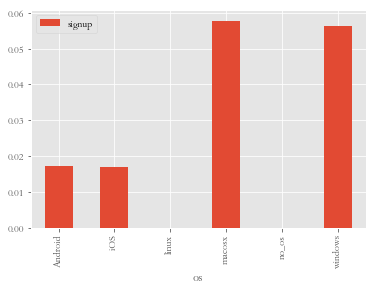

In [521]:
df[['os', 'signup']].groupby(['os']).mean().plot.bar()

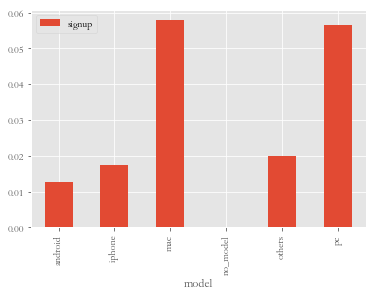

In [522]:
df[['model', 'signup']].groupby(['model']).mean().plot.bar()

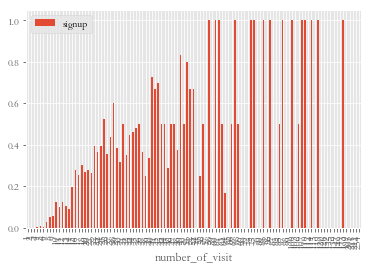

In [524]:
df[['number_of_visit', 'signup']].groupby(['number_of_visit']).mean().plot.bar()

In [525]:
df['number_of_visit']

0         7
1         1
2        23
3         5
4         2
5         7
6         3
7         4
8         4
9         2
10        4
11        1
12        1
13        2
14        3
15        1
16        7
17        5
18       13
19        2
20        1
21        3
22        4
23       12
24       12
25        3
26       18
27       33
28        3
29       35
         ..
11726     8
11727     2
11728     2
11729     1
11730    25
11731     5
11732     2
11733     7
11734     1
11735     2
11736    15
11737     2
11738     1
11739     2
11740     3
11741     9
11742    19
11743     2
11744     3
11745     2
11746     3
11747     2
11748     2
11749     2
11750     9
11751     3
11752     3
11753     3
11754    12
11755     5
Name: number_of_visit, Length: 11756, dtype: int64